# COGS 189 Group 12 
*"Investigating the Impact of Short-Form Video Content on Cognitive Focus Using EEG"*


In [1]:
%pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


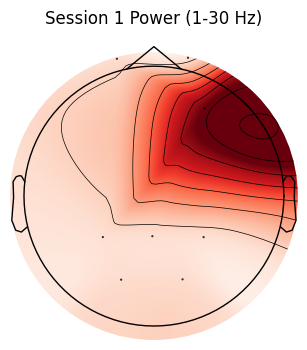

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


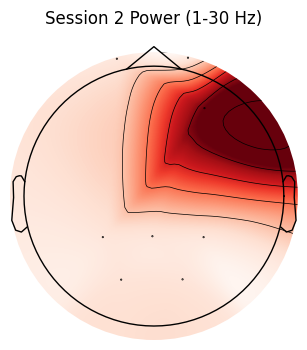

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


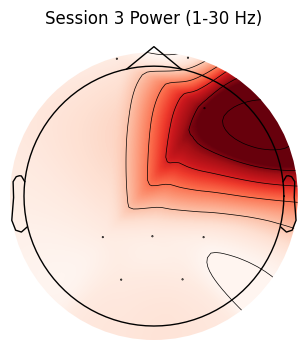

Creating RawArray with float64 data, n_channels=8, n_times=45000
    Range : 0 ... 44999 =      0.000 ...   179.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)

Effective window size : 8.192 (s)


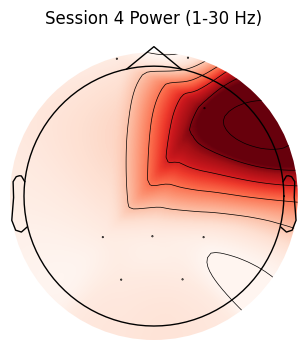

In [5]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# --------------------------------------------------------
# 1) YOUR CUSTOM CHANNEL NAMES (excluding GND and REF)
# --------------------------------------------------------
channel_names_custom = ["F4", "O1", "O2", "Fp1", "P3", "Pz", "P4", "Fp2"]

# We'll rename T5/T6 to T7/T8 for MNE's standard montage:
rename_dict = {"T5": "T7", "T6": "T8"}
channel_names_mne = [rename_dict[ch] if ch in rename_dict else ch 
                     for ch in channel_names_custom]

# All channels are EEG
channel_types = ["eeg"] * len(channel_names_mne)

sfreq = 250.0  # Updated to match EEG data

# Create MNE info
info = mne.create_info(ch_names=channel_names_mne, sfreq=sfreq, ch_types=channel_types)

# Attach a standard 10-20 montage
montage = mne.channels.make_standard_montage("standard_1020")
info.set_montage(montage)

# --------------------------------------------------------
# 2) LOAD EEG DATA (shape = [n_channels, n_times])
# --------------------------------------------------------
eric_eeg_data_1 = np.load("../data/eric/eeg/eeg_eric_session_1.npy")
eric_eeg_data_2 = np.load("../data/eric/eeg/eeg_eric_session_2.npy")
eric_eeg_data_3 = np.load("../data/eric/eeg/eeg_eric_session_3.npy")
eric_eeg_data_4 = np.load("../data/eric/eeg/eeg_eric_session_4.npy")
# Ensure data shape is (8, n_times) by selecting relevant channels
data_1 = eric_eeg_data_1[:len(channel_names_mne), :]
data_2 = eric_eeg_data_2[:len(channel_names_mne), :]
data_3 = eric_eeg_data_3[:len(channel_names_mne), :]
data_4 = eric_eeg_data_3[:len(channel_names_mne), :]

# --------------------------------------------------------
# 3) Create a RawArray. If needed, do additional preprocessing.
# --------------------------------------------------------
def plot_topomap(data, info, title):
    raw = mne.io.RawArray(data, info)
    
    # Apply bandpass filter (1-30 Hz)
    raw.filter(1, 30)
    
    # Compute power spectral density (PSD)
    psd = raw.compute_psd(fmin=1, fmax=30, method="welch")
    mean_psd = psd.get_data().mean(axis=1)  # Average power across frequencies
    
    # Plot topomap
    fig, ax = plt.subplots(figsize=(5, 4))
    mne.viz.plot_topomap(mean_psd, raw.info, axes=ax, show=False)
    ax.set_title(title)
    plt.show()

# Plot topomaps for each dataset
plot_topomap(data_1, info, "Session 1 Power (1-30 Hz)")
plot_topomap(data_2, info, "Session 2 Power (1-30 Hz)")
plot_topomap(data_3, info, "Session 3 Power (1-30 Hz)")
plot_topomap(data_4, info, "Session 4 Power (1-30 Hz)")


In [7]:
# Print just the timestamp row (last row)
timestamp_row = eric_eeg_data_1[-1, :]
print("Timestamp row:", timestamp_row)

Timestamp row: [1.74182319e+09 1.74182319e+09 1.74182319e+09 ... 1.74182337e+09
 1.74182337e+09 1.74182337e+09]


In [12]:
import datetime
def print_readable_timestamps(data, session_name):
    timestamps = data[-1, :]  # Assuming timestamps are in the last row
    readable_times = [datetime.datetime.fromtimestamp(ts) for ts in timestamps]

    print(f"\nReadable Timestamps for {session_name}:")
    for rt in readable_times[:5]:  # Print only the first 5 timestamps for readability
        print(rt)

# Convert and print timestamps for each session
print_readable_timestamps(eric_eeg_data_1, "Session 1")
print_readable_timestamps(eric_eeg_data_2, "Session 2")
print_readable_timestamps(eric_eeg_data_3, "Session 3")
print_readable_timestamps(eric_eeg_data_4, "Session 4")


Readable Timestamps for Session 1:
2025-03-12 16:46:34.698240
2025-03-12 16:46:34.698247
2025-03-12 16:46:34.698254
2025-03-12 16:46:34.698262
2025-03-12 16:46:34.698269

Readable Timestamps for Session 2:
2025-03-12 16:57:28.922284
2025-03-12 16:57:28.922292
2025-03-12 16:57:28.922299
2025-03-12 16:57:28.922306
2025-03-12 16:57:28.922313

Readable Timestamps for Session 3:
2025-03-12 17:08:11.497665
2025-03-12 17:08:11.497672
2025-03-12 17:08:11.497680
2025-03-12 17:08:11.497687
2025-03-12 17:08:11.497694

Readable Timestamps for Session 4:
2025-03-12 17:24:29.721061
2025-03-12 17:24:29.721069
2025-03-12 17:24:29.721076
2025-03-12 17:24:29.721084
2025-03-12 17:24:29.721091


In [15]:
# Get the marker channel index
marker_channel_index = BoardShim.get_marker_channel(BoardIds.CYTON_BOARD)

# Check if the marker channel is included in the data
if marker_channel_index >= eric_eeg_data_1.shape[0]:
    print("No dedicated marker channel in the data.")
    markers = None  # Handle this case as needed
else:
    markers = eric_eeg_data_1[marker_channel_index, :]
    print("Markers array:", markers)

No dedicated marker channel in the data.
